In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('sgemm_product.csv')

In [80]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [81]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [82]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [83]:
df["Binary_Run"] = (df["Run"] >= df["Run"].median()).astype(int)
df["Binary_Run"].value_counts()

1    120801
0    120799
Name: Binary_Run, dtype: int64

In [84]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Run'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


In [85]:
df1 = df.copy()
df1 = df1.sample(n=10000, random_state=0)
df1.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,80.515200,79.710400,25.500800,14.124000,13.860000,17.666400,17.484000,5.040800,2.400500,2.402600,0.507800,0.505500,0.509900,0.499000,0.49610
std,42.464457,42.430104,7.858357,8.039943,7.857288,9.444238,9.456357,2.999873,1.897488,1.911303,0.499964,0.499995,0.499927,0.500024,0.50001
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.00000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [86]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

print(X.shape[0], y.shape[0]) #returning the number of rows 

10000 10000


In [87]:
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
111345,64,128,16,8,8,8,16,8,1,2,0,0,0,1
62516,32,128,32,16,16,8,8,8,2,8,0,1,0,0
143068,128,16,16,8,16,8,16,8,2,1,1,1,0,0
152967,128,32,16,8,16,16,32,8,4,1,0,1,1,1
223400,128,128,32,8,16,16,32,8,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223088,128,128,32,8,16,16,16,8,8,8,0,0,0,0
149536,128,16,32,32,16,32,16,2,4,1,0,0,0,0
237690,128,128,32,32,8,8,32,2,4,2,1,0,1,0
227797,128,128,32,16,8,8,8,2,2,2,0,1,0,1


In [88]:
y

111345    1
62516     0
143068    0
152967    0
223400    1
         ..
223088    1
149536    1
237690    1
227797    1
149147    0
Name: Binary_Run, Length: 10000, dtype: int32

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [94]:
y_train.shape[0]

7000

In [95]:
X_train.shape[0]

7000

In [96]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
#clf = SVC(kernel='linear',) # Linear Kernel

In [97]:
scaler = StandardScaler()
print(scaler.fit(data))
scaler.transform(data)

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[-1.51675724, -1.51675724, -1.2109972 , ..., -0.26849745,
        -0.27592653, -0.27444642],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -0.37510138,
        -0.37522764, -0.37658896],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -0.3710054 ,
        -0.37039956, -0.37154489],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ..., -0.49440012,
        -0.49435642, -0.49467729],
       [ 1.12045227,  1.12045227,  0.82576574, ..., -0.51292696,
        -0.51285501, -0.51286715],
       [ 1.12045227,  1.12045227,  0.82576574, ..., -0.54187006,
        -0.54182349, -0.54170788]])

In [98]:
clf = SVC(kernel='poly') # Linear Kernel

In [99]:
model = SVC(kernel='rbf',gamma=27)

In [100]:
model1 = SVC(kernel='linear')

In [101]:
#Train the model using the training sets
model.fit(X_train, y_train) #rbf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=27, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
#Predict the response for test dataset
y_pred = model.predict(X_test) #rbf

In [103]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.5013333333333333


In [104]:
clf.fit(X_train, y_train) #poly

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
y_pred1 = clf.predict(X_test) #poly

In [106]:
acc1 = accuracy_score(y_test, y_pred1) #poly
print(acc1)

0.841


In [107]:
model1.fit(X_train, y_train) #linear

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
y_pred2 = model1.predict(X_test) #linear

In [109]:
acc2 = accuracy_score(y_test, y_pred2) #linear
print(acc2) 

0.8286666666666667


In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred)) #rbf
print(classification_report(y_test,y_pred)) #rbf

[[1504    0]
 [1496    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1504
           1       0.00      0.00      0.00      1496

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000



c:\users\chitr\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
print(confusion_matrix(y_test, y_pred1)) #poly
print(classification_report(y_test,y_pred1))

[[1384  120]
 [ 357 1139]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1504
           1       0.90      0.76      0.83      1496

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000



In [112]:
print(confusion_matrix(y_test, y_pred2))  #linear
print(classification_report(y_test,y_pred2))

[[1260  244]
 [ 270 1226]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1504
           1       0.83      0.82      0.83      1496

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



In [115]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [122]:
from sklearn.metrics import make_scorer,f1_score,fbeta_score
from sklearn.model_selection import GridSearchCV
# TODO: Initialize the classifier
#clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
param_grid = [{'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}            
             ]
#parameters = {'max_features':[1],'n_estimators':[10,12]}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
#grid_obj = GridSearchCV(adab, parameters, scoring=scorer)
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'roc_auc')

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_search_ABC.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Unoptimized model
------
Accuracy score on testing data: 0.8410
F-score on testing data: 0.8719

Optimized Model
------
Final accuracy score on the testing data: 0.8963
Final F-score on the testing data: 0.9145


In [123]:
scores = []
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10) #rbf
scores

array([0.50428571, 0.50428571, 0.50428571, 0.50428571, 0.50428571,
       0.50571429, 0.50571429, 0.50571429, 0.50571429, 0.50571429])

In [124]:
scores = []
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, y_train, cv=10)
scores

array([0.84285714, 0.83      , 0.83428571, 0.83571429, 0.83142857,
       0.82571429, 0.81285714, 0.83571429, 0.84857143, 0.84      ])

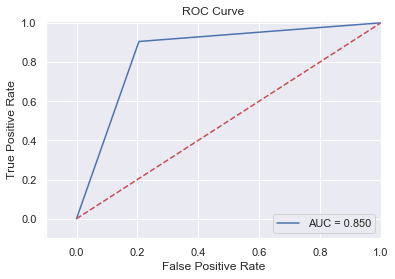

In [129]:
from sklearn.metrics import roc_curve,auc
#from sklearn import metrics
def roc_auc(y_test,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_auc(predictions,y_test)